In [5]:
using CARMA
using PyPlot
using PyCall
using Periodogram

@pyimport seaborn as sns

sns.set_context("notebook")
sns.set_style("ticks")
sns.set_palette("colorblind")

LoadError: [91mArgumentError: Module Periodogram not found in current path.
Run `Pkg.add("Periodogram")` to install the Periodogram package.[39m

In [2]:
d = readdlm("../data/song/tablesong.dat")
ts = d[:,1]
ys = d[:,2]
dys = d[:,3];

In [3]:
ys_lowpass, dys_lowpass = LowPass.exp_lowpass(ts, ys, dys, 2)
ys_highpass = ys - ys_lowpass
dys_highpass = sqrt.(dys_lowpass.*dys_lowpass + dys.*dys);

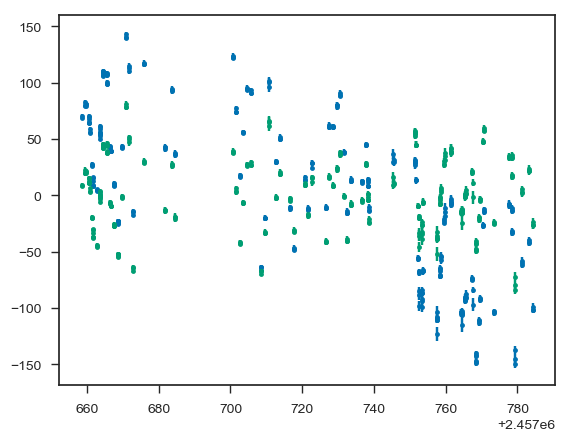

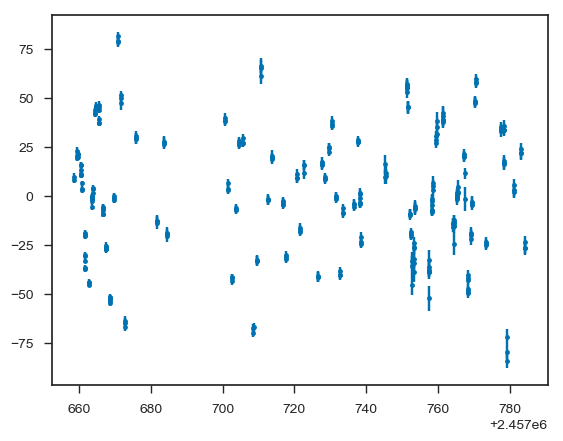

(PyObject <matplotlib.lines.Line2D object at 0x13e672350>, (), (PyObject <matplotlib.collections.LineCollection object at 0x13e672790>,))

In [4]:
errorbar(ts, ys-mean(ys), dys, fmt=".")
errorbar(ts, ys_highpass, dys_highpass, fmt=".")
figure()
errorbar(ts, ys_highpass, dys_highpass, fmt=".")

In [6]:
Pkg.add("Periodogram")

LoadError: [91m[91munknown package Periodogram[39m
macro expansion at ./pkg/entry.jl:53 [inlined]
(::Base.Pkg.Entry.##1#3{String,Base.Pkg.Types.VersionSet})() at ./task.jl:335[39m

In [7]:
push!(LOAD_PATH, "../code")
using Periodogram

In [14]:
f = collect(0.01:0.01:2)
power = Periodogram.pgram(ts, ys, dys, f) ;

In [18]:
Periodogram

702-element Array{Float64,1}:
   -68.7696
   -84.4491
   -50.1591
   -53.6153
   -63.248 
    70.3327
   106.606 
   142.401 
   314.874 
   329.624 
   349.427 
  -338.779 
  -354.592 
     ⋮     
   758.357 
 -2311.65  
  4477.38  
   599.877 
  2386.55  
  3250.66  
   376.99  
  1698.85  
  6618.28  
  1160.17  
 -6013.84  
  3731.64  